## Long Profile Plotting

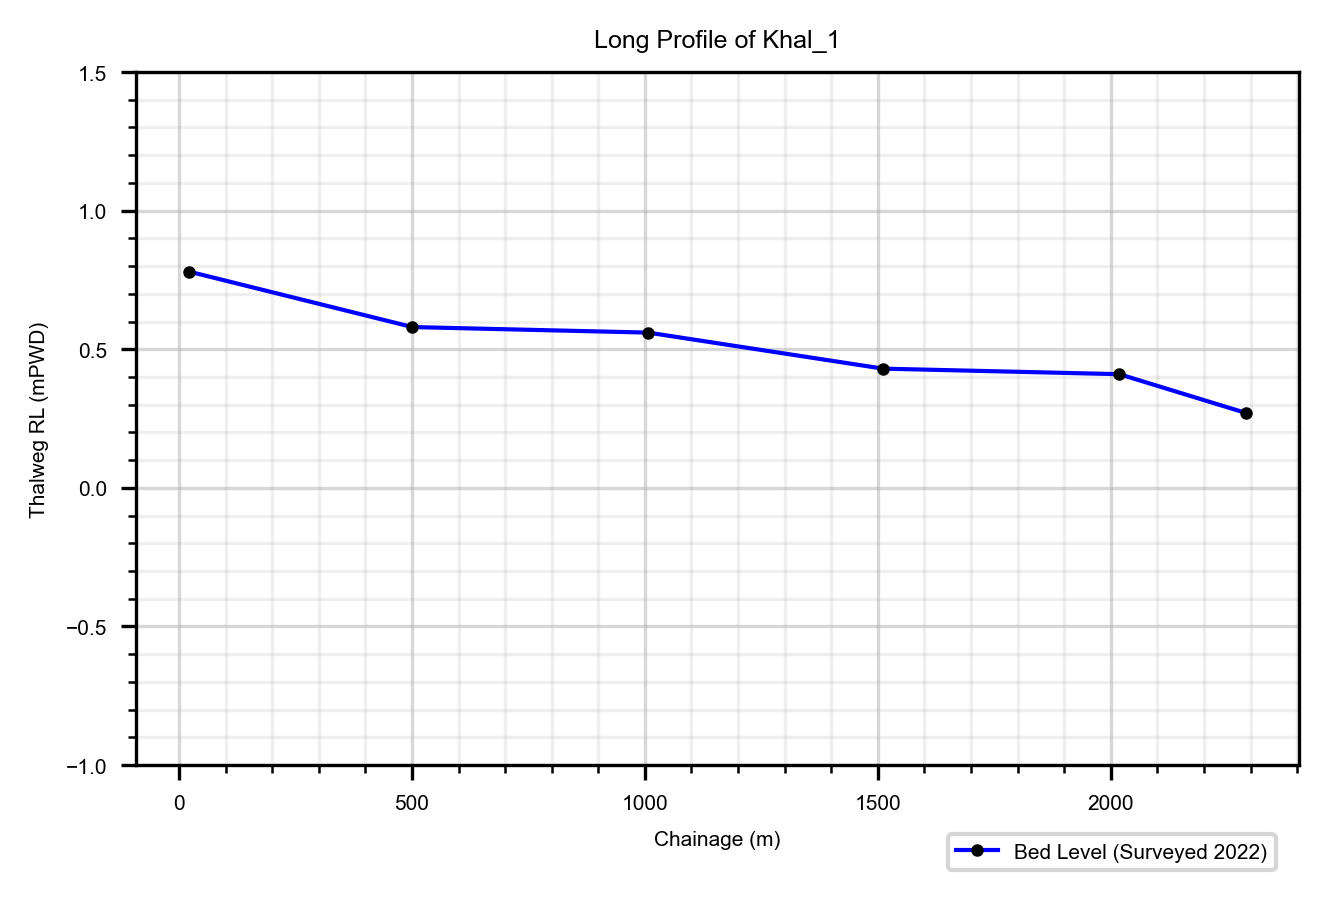

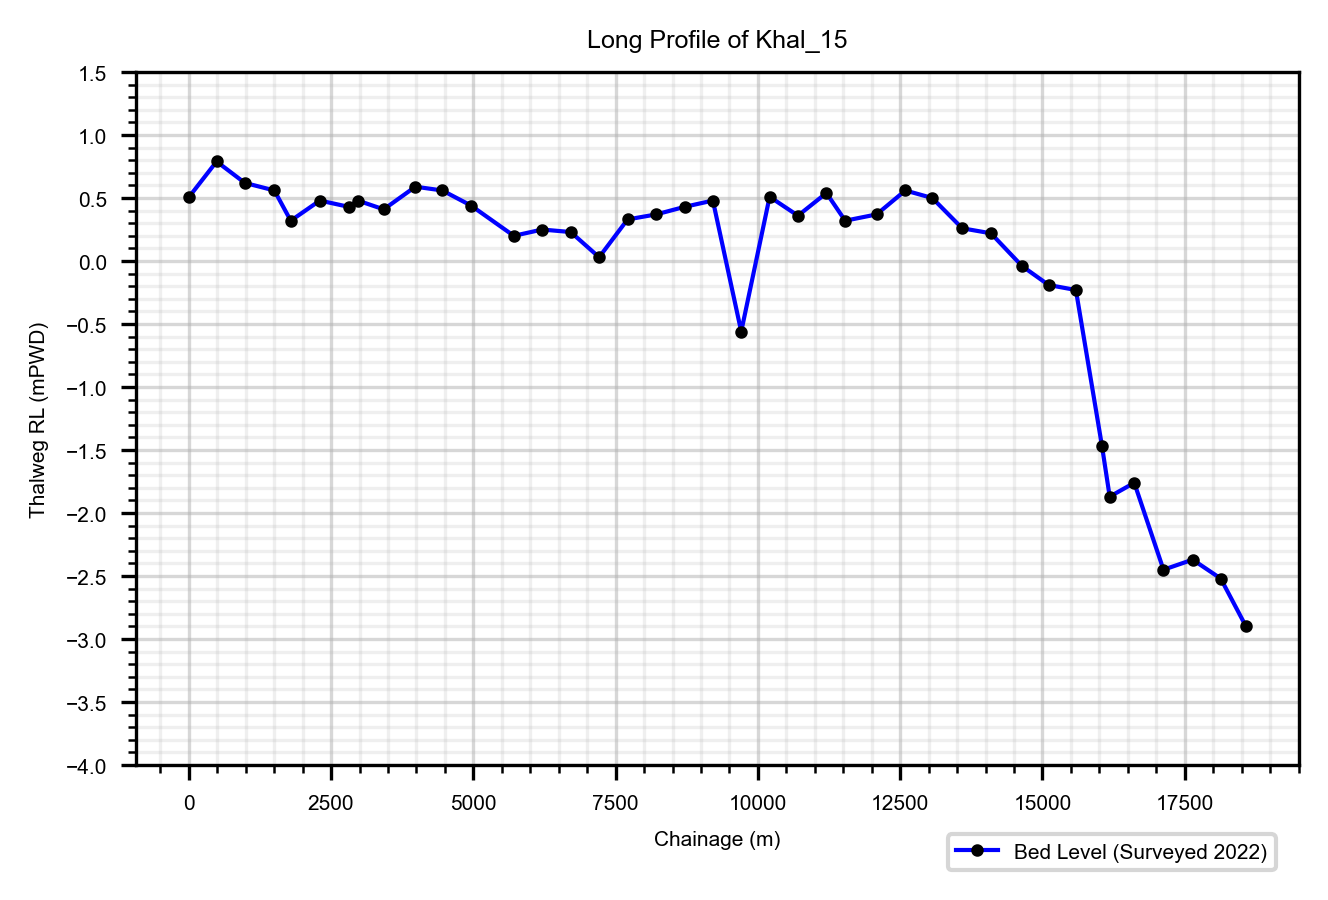

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# Reading the cross-section points excel file    
df = pd.read_excel(r"E:\Script\Kutubdia_Khal_Cross_Section_Plotting\Data\Data_for_Khal_Long_Profile_Plotting.xlsx")

# Setting the name of khal and chainage field in the file
khal_unique_field = 'HD_Khal'
sec_unique_field = 'HD_Chainage'


# Iterating through the individual khal
for khal in df[khal_unique_field].unique():
    gr2 = df.groupby(khal_unique_field)
    df2 = gr2.get_group(khal)
    
    # Defining two empty list to store thalweg point and its corresponding khal chainage
    thalweg_list = []
    chainage_list = []
    
    # Ierating through each cross-section to find the lowest point
    for x in df2[sec_unique_field].unique():
        gr = df2.groupby(sec_unique_field)
        n_df = gr.get_group(x)
    
        # Finding the lowest point(thalweg) of the cross section
        lp = n_df['RL_mPWD'].min()
        
        # Updating thalweg point and chainage into the list
        thalweg_list.append(lp)
        chainage_list.append(x)
    
    # Setting the plot font family, weight and height by defining a dictionary
    font={'family':'Arial',
         'weight':'normal',
         'size':5}

    plt.rc('font',**font)
    plt.rc('xtick',labelsize=5)
    plt.rc('ytick',labelsize=5)

    plt.figure(figsize=(5,3),dpi=300)

    r_df = pd.DataFrame({'Chainage':chainage_list, 'Thalweg_RL_mPWD':thalweg_list})
    plt.plot(r_df['Chainage'], r_df['Thalweg_RL_mPWD'],lw=1,color='blue',marker='o',markersize=2,markerfacecolor='black',
                 markeredgecolor='black',label='Bed Level (Surveyed 2022)')

    plt.minorticks_on()
    plt.grid(alpha=0.5)
    plt.grid(which='minor',alpha=0.2)
    low,high=round(r_df['Thalweg_RL_mPWD'].min())-1,round(r_df['Thalweg_RL_mPWD'].max())+1
    plt.legend(bbox_to_anchor=(0.98, -0.1), loc=1, borderaxespad=0)
    #plt.legend(loc=9)
    plt.yticks(np.arange(low,high,0.5))
    
    plot_title = 'Long Profile of {a}'.format(a=khal)
    plt.title(plot_title)
    plt.xlabel('Chainage (m)')
    plt.ylabel('Thalweg RL (mPWD)')
    
    # Saving the plotted Long Profile figure
    plt.savefig(r"E:\Script\Kutubdia_Khal_Cross_Section_Plotting\Output\Long Profile\{}_Thalweg_LP.jpg".format(khal), 
                bbox_inches='tight', dpi=300)